# DATA ACQUISITION 

In [1]:
import numpy as np
import pandas as pd

print(f"NumPy Version: {np.__version__}\nPandas Version: {pd.__version__}")

NumPy Version: 1.24.3
Pandas Version: 2.1.1


In [2]:
kidney = pd.read_csv("E:/Data Science Institute/Datasets/Kidney Stones/kidney stones.csv")

# EXPLORATORY DATA ANALYSIS 
## ( DATA PREPARATION + FEATURE ENGINEERING )

In [3]:
import seaborn as sns 
import scipy as sp 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

print(f"Seaborn Version: {sns.__version__}\nMatplotlib Version: {mpl.__version__}\nSklearn Version: {sklearn.__version__}\nScipy Version: {sp.__version__}")

Seaborn Version: 0.13.0
Matplotlib Version: 3.8.0
Sklearn Version: 1.3.0
Scipy Version: 1.11.4


In [4]:
kidney.shape

(79, 7)

In [5]:
kidney.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [6]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [7]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
gravity,79.0,1.018114,0.007239,1.005,1.012,1.018,1.0235,1.04
ph,79.0,6.028481,0.724307,4.760,5.530,5.940,6.3850,7.94
osmo,79.0,612.848101,237.514755,187.000,413.000,594.000,792.0000,1236.00
cond,79.0,20.813924,7.938994,5.100,14.150,21.400,26.5500,38.00
urea,79.0,266.405063,131.254550,10.000,160.000,260.000,372.0000,620.00
calc,79.0,4.138987,3.260051,0.170,1.460,3.160,5.9300,14.34
target,79.0,0.430380,0.498293,0.000,0.000,0.000,1.0000,1.00


## Renaming columns 

In [8]:
column_mapping = {
    'gravity':'specific_gravity', 
    'ph': 'urine_ph', 
    'osmo':'osmolality',
    'cond':'conductivity', 
    'calc': 'calcium', 
    'target': 'outcome'
                }

kidney.rename(columns=column_mapping, inplace=True)

## Checking null values

In [9]:
kidney.isnull().sum()

specific_gravity    0
urine_ph            0
osmolality          0
conductivity        0
urea                0
calcium             0
outcome             0
dtype: int64

## Kidney stones outcome ratio

In [10]:
kidney['outcome'].value_counts()

outcome
0    45
1    34
Name: count, dtype: int64

<Axes: xlabel='outcome', ylabel='Count'>

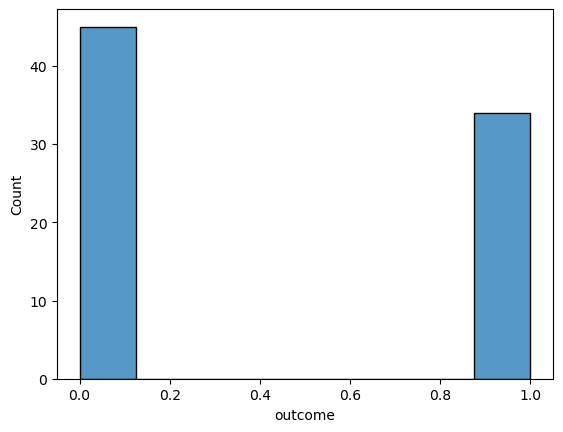

In [11]:
sns.histplot(kidney['outcome'])

### Percentage of sample positive for kidney stones

In [12]:
print(f"kidney ratio = {sum(kidney['outcome']) / len(kidney):.4f}")

kidney ratio = 0.4304


* Data is unbalanced 

## Checking number of duplicate rows 

In [13]:
kidney.duplicated().sum()

0

## Checking unique values for invalid entries 

In [14]:
for col in kidney.columns:
    unique_values = kidney[col].unique()
    print(f"Unique values for {col} : {unique_values}")

Unique values for specific_gravity : [1.021 1.017 1.008 1.011 1.005 1.02  1.012 1.029 1.015 1.025 1.006 1.007
 1.018 1.014 1.024 1.019 1.023 1.01  1.009 1.026 1.013 1.022 1.031 1.04
 1.034 1.033 1.028 1.027 1.016]
Unique values for urine_ph : [4.91 5.74 7.2  5.51 6.52 5.27 5.62 5.67 5.41 6.13 6.19 5.53 7.12 5.35
 5.21 4.9  6.63 6.81 6.88 6.14 6.3  5.47 7.38 5.96 5.68 6.76 7.61 6.61
 5.87 5.44 7.92 5.98 6.56 5.94 5.85 5.66 6.4  6.35 6.37 6.18 5.33 5.64
 6.79 5.97 5.77 5.6  5.36 5.16 5.86 6.27 7.01 6.21 5.73 7.94 6.28 5.56
 5.71 5.24 5.58 5.9  6.75 6.9  6.29 4.76 5.4  5.14 5.09 7.9  4.81 6.03]
Unique values for osmolality : [ 725  577  321  408  187  668  461 1107  543  779  345  907  242  283
  450  684  253  947  395  565  874  760  631  749  455  527  225  241
  781  680  579  559  256  970  702  341  704  325  694  815  386  541
  343  876  774  698  866  775  853  822  531  371  443  442  364  567
  838  658  854  956 1236 1032  487  516  456  251  945  833  312  840
  703  736  721

## Investigating urine calcium

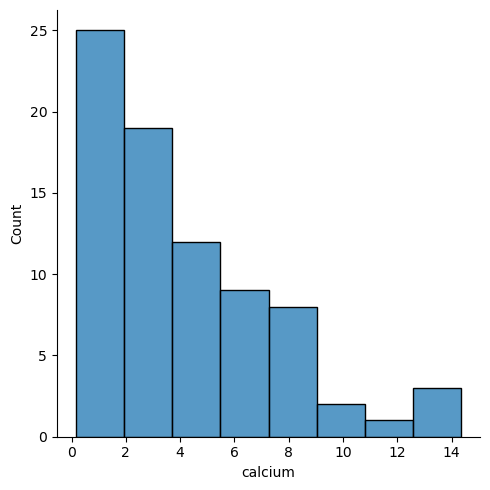

In [15]:
sns.displot(kidney['calcium'])

## Investigating urine conductivity

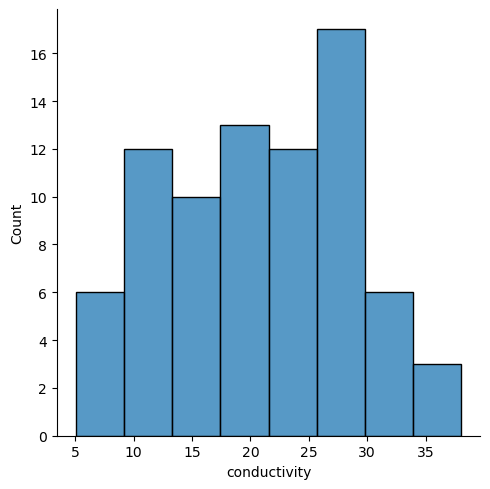

In [16]:
sns.displot(kidney['conductivity'])

## Investigating urine pH

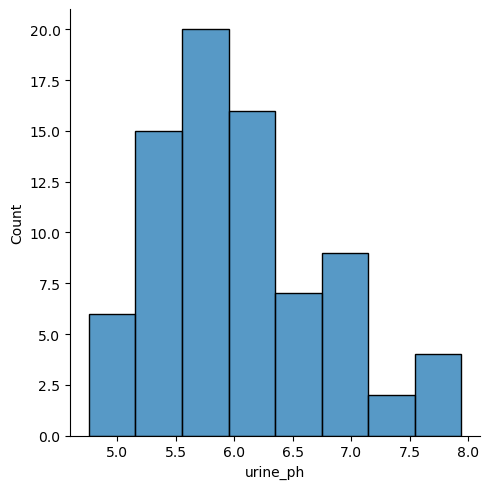

In [17]:
sns.displot(kidney['urine_ph'])

## Investigating amount of urea 

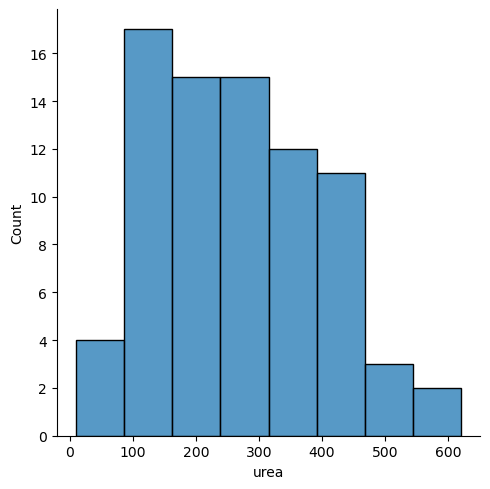

In [18]:
sns.displot(kidney['urea'])

## Investigating urine osmolality

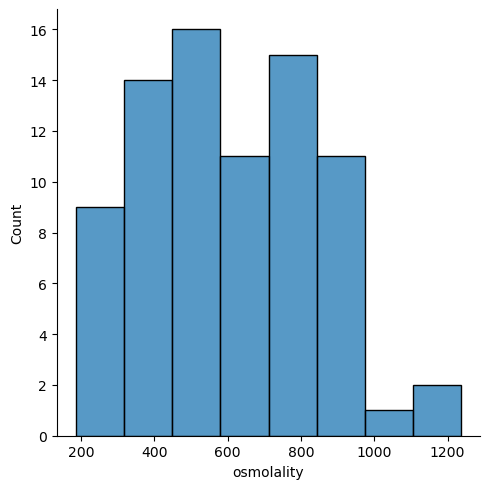

In [19]:
sns.displot(kidney['osmolality'])

## Inspecting pair plot of biochemical markers

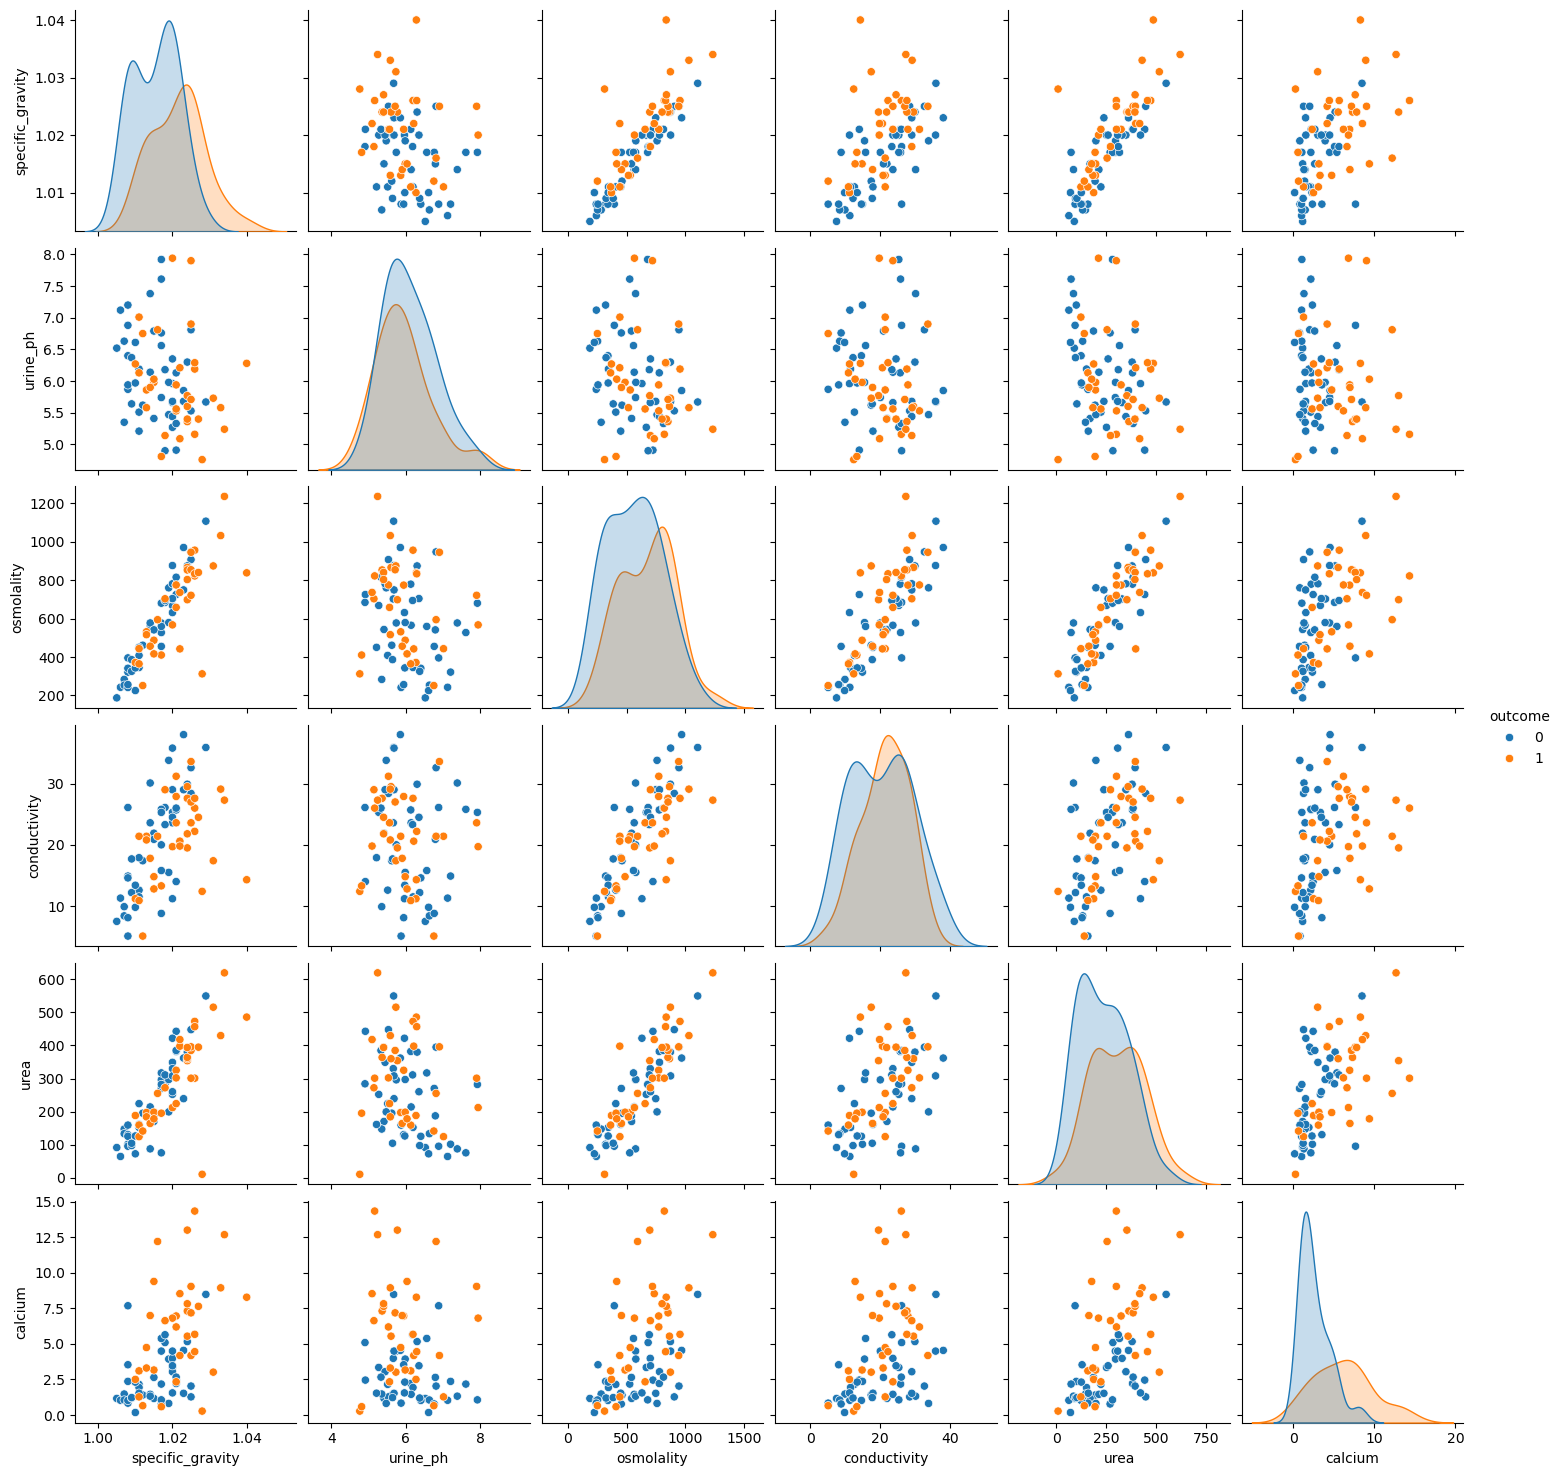

In [20]:
sns.pairplot(kidney, hue='outcome')

## Checking correlation 

<Axes: >

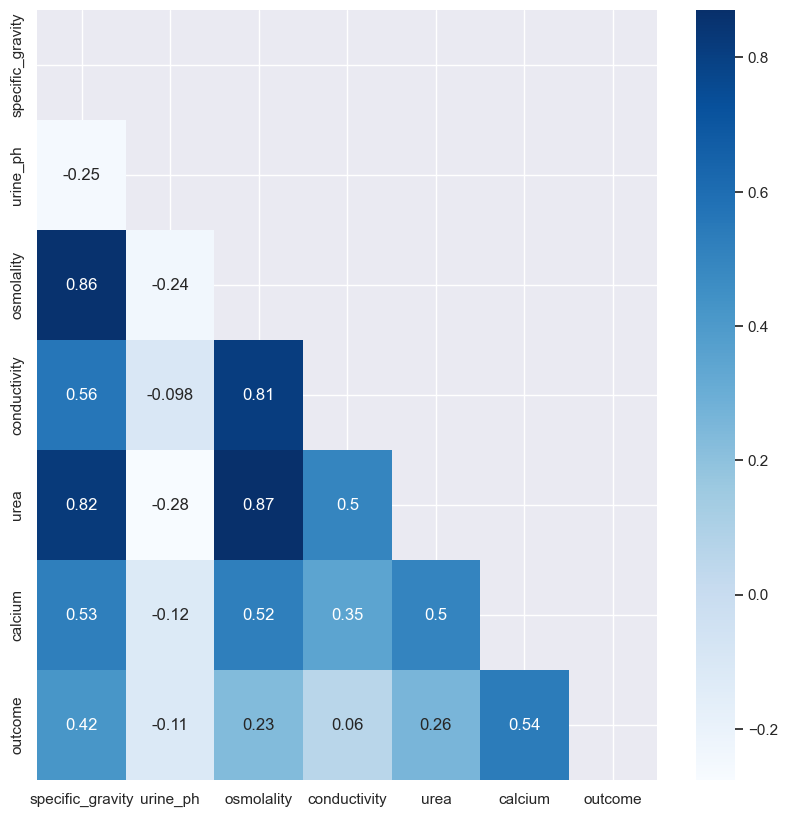

In [21]:
corr = kidney.corr()

# Get upper criangle of the co-relation matrix
matrix = np.triu(corr)


# Use upper triangle matrix as mask 
sns.set(rc={"figure.figsize":(10, 10)})   
sns.heatmap(corr, cmap="Blues", annot=True, mask=matrix)

## Creating separate dataframes based on kidney stones outcome 

In [22]:
stones_present = kidney[kidney['outcome'] == 1]

In [23]:
stones_absent = kidney[kidney['outcome'] == 0]

## Investigating urea and osmolality relationship 

### Combined

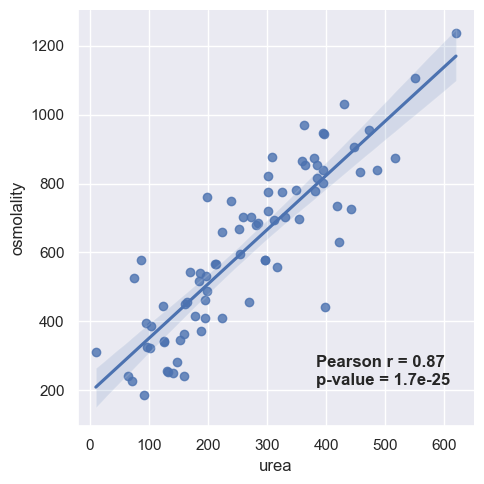

In [24]:
q = sns.lmplot(data=kidney, x='urea', y='osmolality', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['osmolality'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p),
            transform=ax.transAxes, weight='bold')
    
q.map_dataframe(annotate)
plt.show()

### With kidney stones 

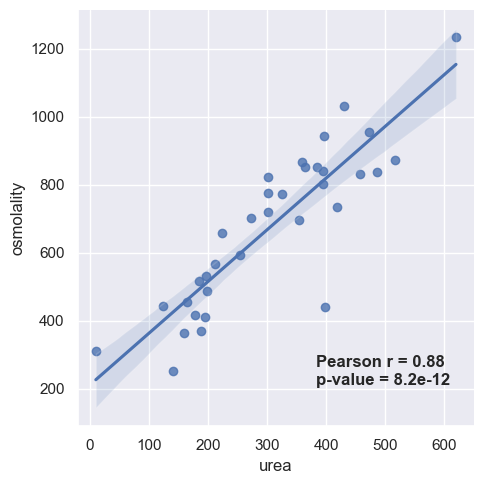

In [25]:
q = sns.lmplot(data=stones_present, x='urea', y='osmolality', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['osmolality'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### Without kidney stones  

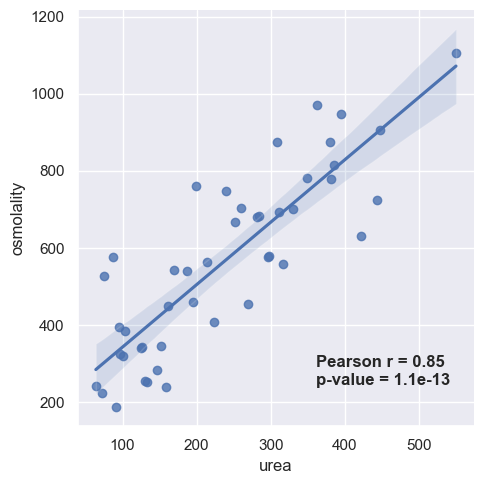

In [26]:
q = sns.lmplot(data=stones_absent, x='urea', y='osmolality', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['osmolality'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

## Investigating urea and conductivity relationship

### Combined 

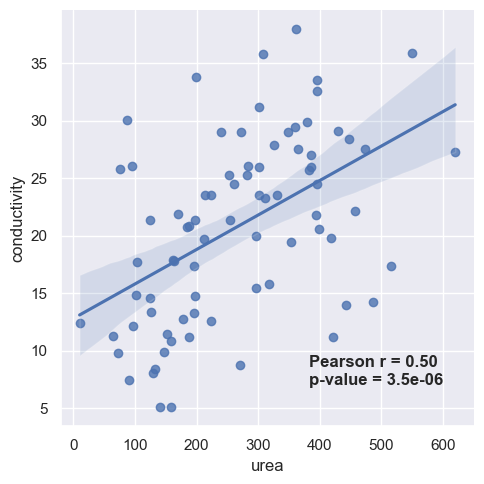

In [27]:
q = sns.lmplot(data=kidney, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### With kidney stones 

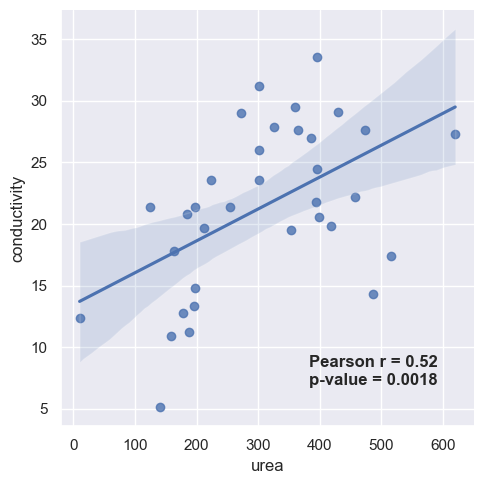

In [28]:
q = sns.lmplot(data=stones_present, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### Without kidney stones 

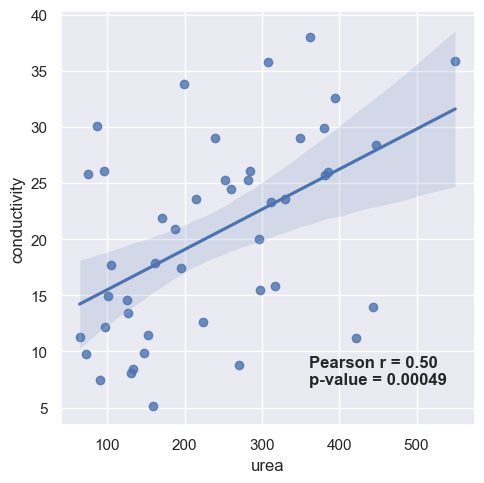

In [29]:
q = sns.lmplot(data=stones_absent, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

## Investigating calcium and conductivity relationship

### Combined 

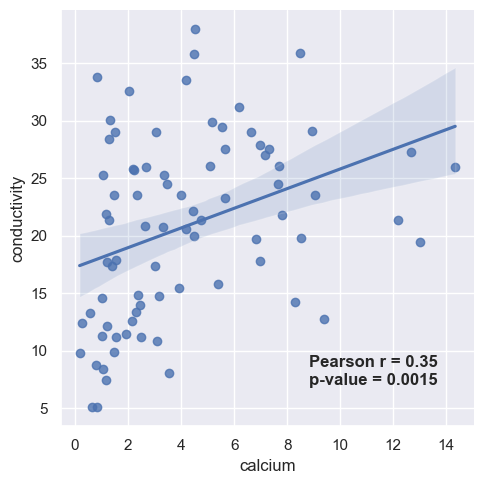

In [30]:
q = sns.lmplot(data=kidney, x='calcium', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['calcium'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### With kidney stones 

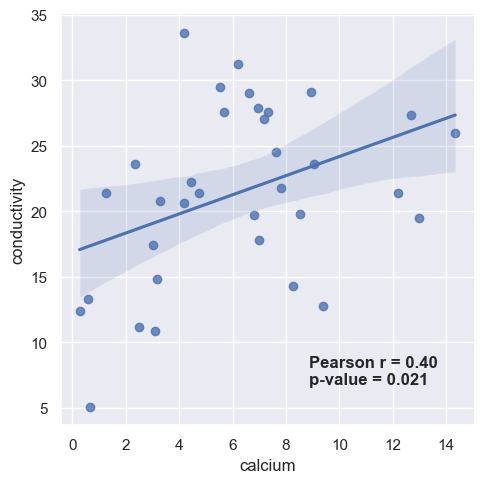

In [31]:
q = sns.lmplot(data=stones_present, x='calcium', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['calcium'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### Without kidney stones 

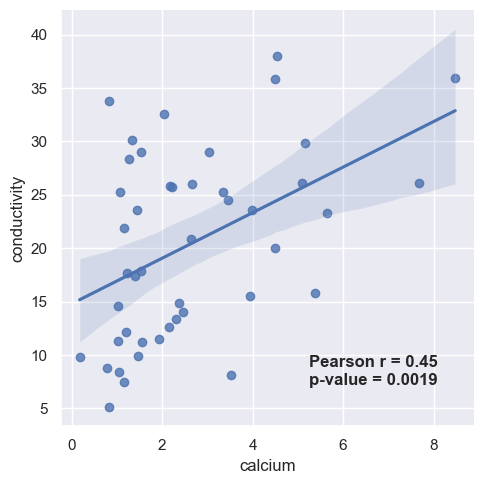

In [32]:
q = sns.lmplot(data=stones_absent, x='calcium', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['calcium'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

## Investigating urea and conductivity relationship

### Combined 

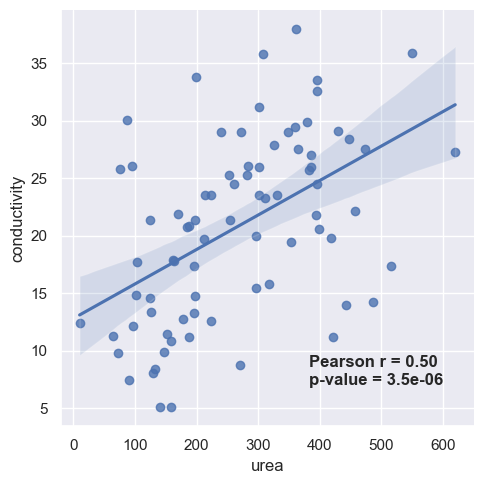

In [33]:
q = sns.lmplot(data=kidney, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### With kidney stones 

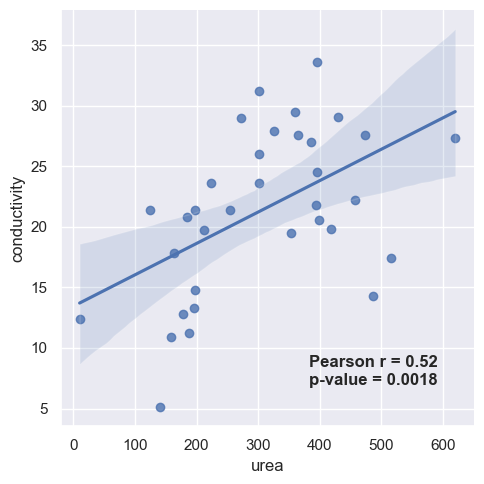

In [34]:
q = sns.lmplot(data=stones_present, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

### Without kidney stones 

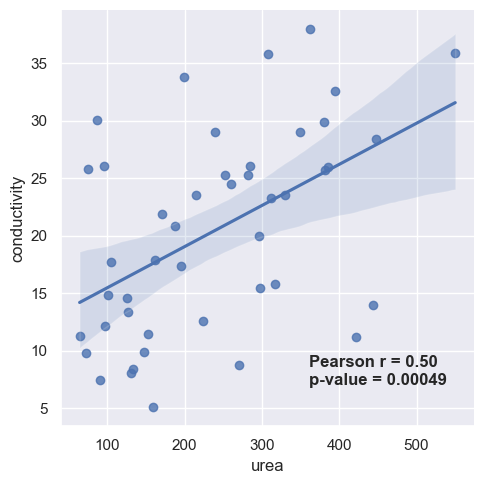

In [35]:
q = sns.lmplot(data=stones_absent, x='urea', y='conductivity', height=5)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['urea'], data['conductivity'])
    ax = plt.gca()
    ax.text(.6, .1, 'Pearson r = {:.2f}\np-value = {:.2g}'.format(r, p), weight='bold',
            transform=ax.transAxes)
    
q.map_dataframe(annotate)
plt.show()

## Investigating calcium and kidney stones relationship 

<Axes: xlabel='outcome', ylabel='calcium'>

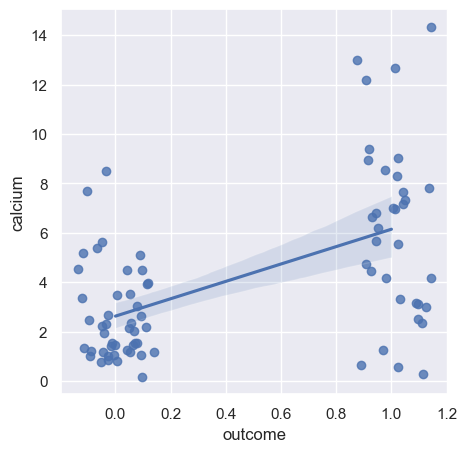

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.regplot(data=kidney, x='outcome', y='calcium', x_jitter=.15)

## Checking outliers 

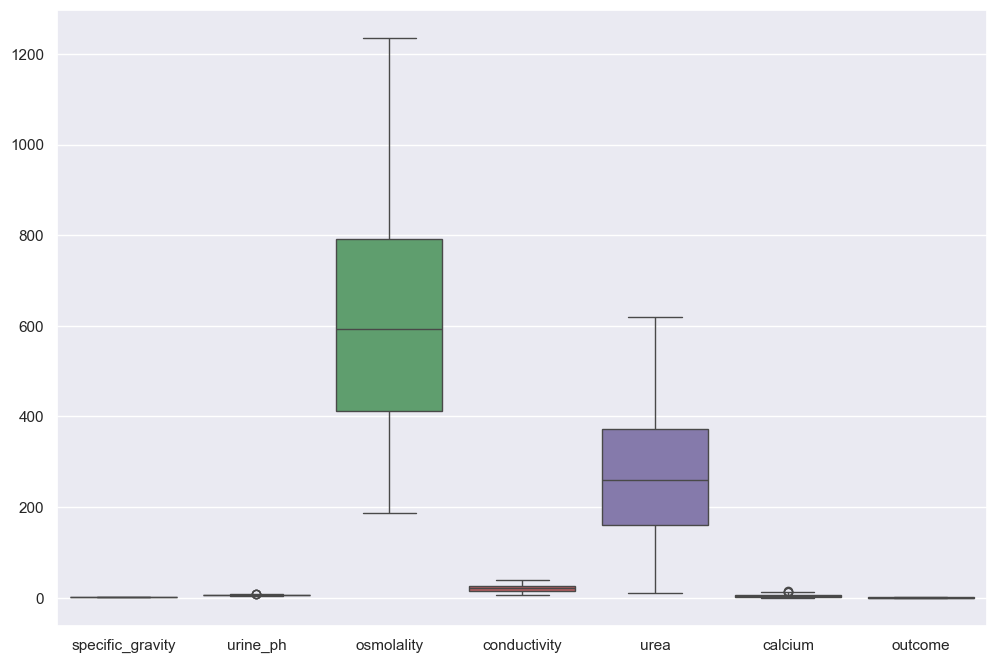

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kidney)
plt.show()

### Removing larger value columns to visualise box plots of smaller value columns clearly 

In [38]:
viz_df = kidney.drop(columns=['osmolality', 'urea']) 

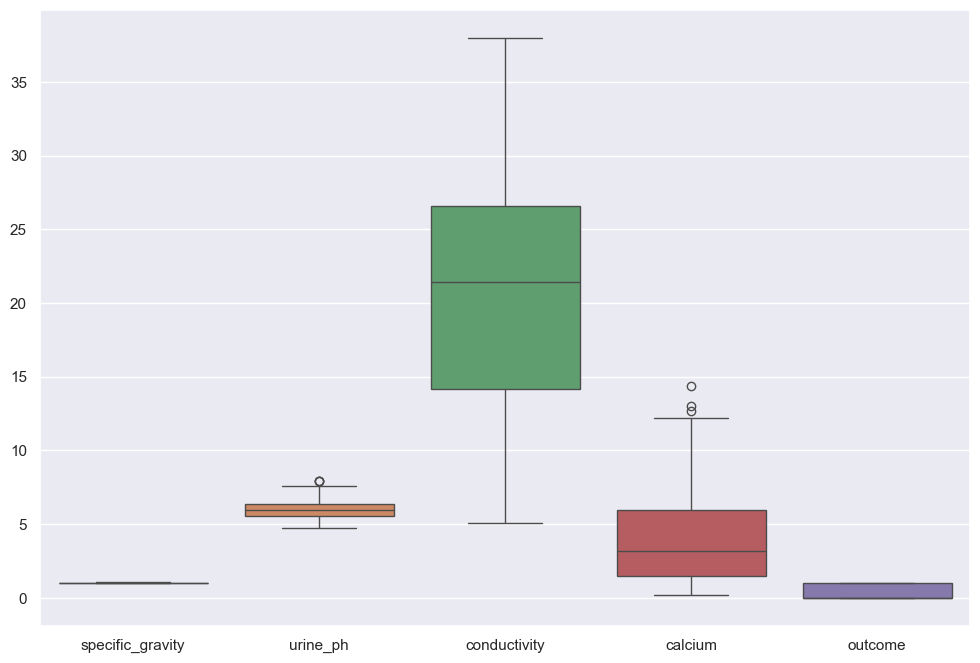

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=viz_df)
plt.show()

## Inspecting individual box plots

### Urine pH

<Axes: ylabel='urine_ph'>

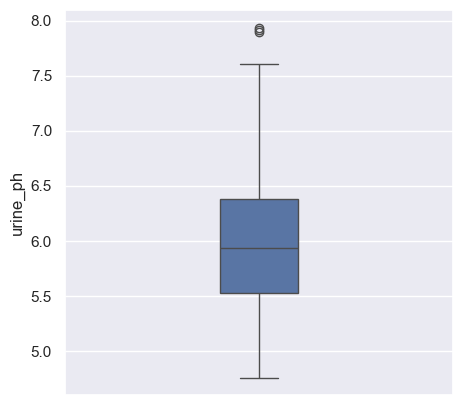

In [40]:
plt.figure(figsize=(5,5))
sns.boxplot(y=kidney['urine_ph'], width=0.2)

### Urine calcium

<Axes: ylabel='calcium'>

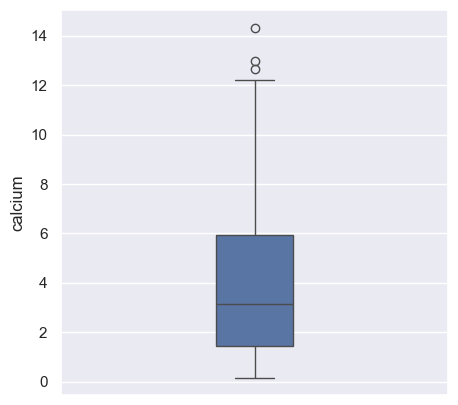

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y=kidney['calcium'], width=0.2)

## Capping Outliers 

In [42]:
columns_to_cap = ['urine_ph', 'calcium']

In [43]:
def cap_outliers(data, columns):
    
    for column in columns:
       
        q1 = data[column].quantile(0.25)      # Get the Q1 (25 percentile) and Q3 (75 percentile)
        q3 = data[column].quantile(0.75)

        iqr = q3 - q1                         # Calculate interquartile range

        max_limit = q3 + (1.5 * iqr)          # Set limits
        min_limit = q1 - (1.5 * iqr)

        data[column] = np.clip(               # Cap outliers
                        data[column], 
                        a_min=min_limit, 
                        a_max=max_limit)     
    

In [44]:
cap_outliers(data=kidney, columns=columns_to_cap)

### Checking capping result

In [45]:
capped_columns = ['urine_ph', 'calcium']

<Axes: >

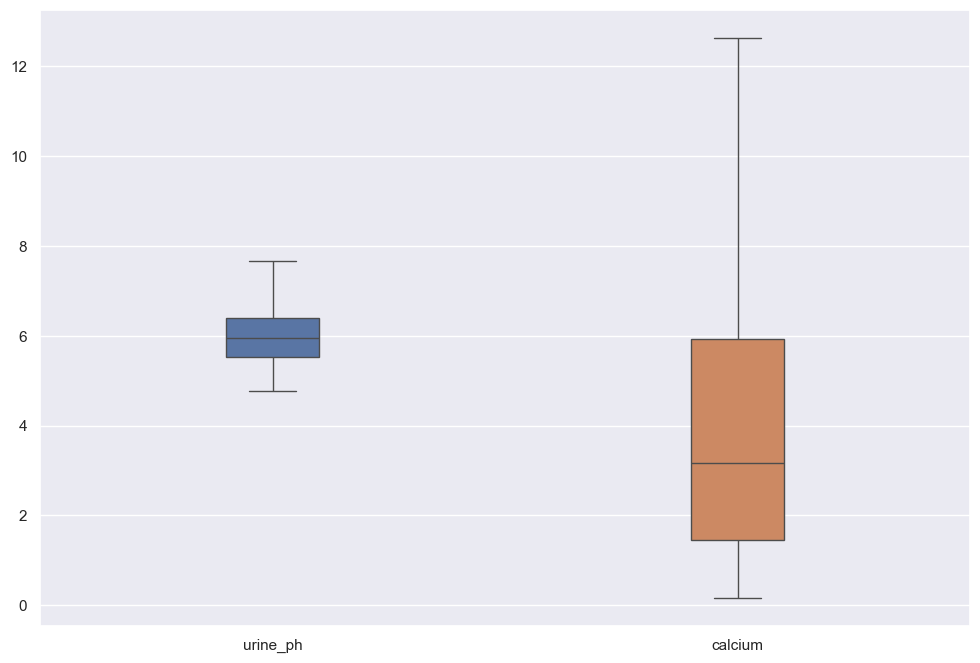

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kidney[capped_columns], width=0.2)

In [47]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   specific_gravity  79 non-null     float64
 1   urine_ph          79 non-null     float64
 2   osmolality        79 non-null     int64  
 3   conductivity      79 non-null     float64
 4   urea              79 non-null     int64  
 5   calcium           79 non-null     float64
 6   outcome           79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


## Scaling features to aid in solver convergence 

In [48]:
# Make copy of dataset to preserve original 
kidney_scaled = kidney.copy()

In [49]:
features_unchanged = ['specific_gravity', 'outcome']
original_features = kidney_scaled[features_unchanged]

In [50]:
list(kidney.columns)

['specific_gravity',
 'urine_ph',
 'osmolality',
 'conductivity',
 'urea',
 'calcium',
 'outcome']

In [51]:
features_to_scale = [
                 'urine_ph',
                 'osmolality',
                 'conductivity',
                 'urea',
                 'calcium',
                     ]

In [52]:
def scale_features(df, features_to_scale, method):
    
    df_copy = df.copy()

    data_to_scale = df_copy[features_to_scale]

    if method == 'zscore':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid Method: Choose from 'Z Score', 'MinMax', or 'Robust'.")

    scaled_data = scaler.fit_transform(data_to_scale)
    
    scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)

    return scaled_df


In [53]:
# Call scaling function 

scaled_data = scale_features(df=kidney_scaled, features_to_scale=features_to_scale, method='zscore' )

In [54]:
scaled_data.head()

,urine_ph,osmolality,conductivity,urea,calcium
0,-1.593880,0.475206,-0.863770,1.354036,-0.525658
1,-0.400869,-0.151894,-0.103177,0.226918,0.119470
2,1.697679,-1.236609,-0.749681,-1.268238,-0.554119
3,-0.731463,-0.867976,-1.041241,-0.325139,-0.620530
4,0.720273,-1.804390,-1.687745,-1.344912,-0.933607


In [55]:
# Concatenate scaled and unscaled features

kidney_scaled = pd.concat([original_features, scaled_data], axis=1)
kidney_scaled.head()

,specific_gravity,outcome,urine_ph,osmolality,conductivity,urea,calcium
0,1.021,0,-1.593880,0.475206,-0.863770,1.354036,-0.525658
1,1.017,0,-0.400869,-0.151894,-0.103177,0.226918,0.119470
2,1.008,0,1.697679,-1.236609,-0.749681,-1.268238,-0.554119
3,1.011,0,-0.731463,-0.867976,-1.041241,-0.325139,-0.620530
4,1.005,0,0.720273,-1.804390,-1.687745,-1.344912,-0.933607


In [56]:
kidney_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   specific_gravity  79 non-null     float64
 1   outcome           79 non-null     int64  
 2   urine_ph          79 non-null     float64
 3   osmolality        79 non-null     float64
 4   conductivity      79 non-null     float64
 5   urea              79 non-null     float64
 6   calcium           79 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.4 KB


# MODEL BUILDING 

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
import joblib 

In [58]:
X = kidney_scaled.drop(['outcome'], axis='columns')
y = kidney_scaled['outcome']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Tuning hyperparameters

### Tuning Solver

In [60]:
# Instantiate the model       

logreg = LogisticRegression(random_state=7, max_iter=100)


In [61]:
#Grid search cross validation

parameters = [{'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']}] 


grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,     #list of evalution metrics 
                           refit=True
                           )


grid_search.fit(X_train,y_train)

print(f"'Best Solver:{grid_search.best_params_}")

'Best Solver:{'solver': 'lbfgs'}


### Tuning remaining hyperparameters

In [62]:
logreg = LogisticRegression(solver='lbfgs', random_state=7, max_iter=100, verbose=1)

In [63]:
parameters = [{'penalty':['none', 'l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

scoring = {"AUC": "roc_auc", "accuracy": 'accuracy'}

grid_search = GridSearchCV(estimator = logreg,
                           scoring = scoring,
                           return_train_score = True,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = 2,
                           refit = 'AUC')

grid_search.fit(X, y)
results = grid_search.cv_results_

print('='*50)
print(f"Best parameters: {grid_search.best_params_}\nBest score: {grid_search.best_score_}")
print('='*50)

Best parameters: {'C': 0.001, 'penalty': 'none'}
Best score: 0.8391666666666666


C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Plugging in best hyperparameters

In [64]:
logreg = LogisticRegression(solver='lbfgs', penalty='none', C=0.001, random_state=7, n_jobs=None, l1_ratio=None)

## Running 10-fold cross validation 

In [65]:
kfold = KFold(n_splits=10, shuffle=True, random_state=43)

training_scores =[]
testing_scores = []

# Iterate over each fold

for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model = logreg.fit(X_train, y_train)

    # Evaluate the model and store the accuracy score
    training = logreg.score(X_train, y_train)
    testing = logreg.score(X_test, y_test)
    training_scores.append(training)
    testing_scores.append(testing) 

for i, (train, test) in enumerate(zip(training_scores, testing_scores), 1):
    print(f'Fold {i}: Training set accuracy = {train:.4f}, Testing set accuracy = {test:.4f}')

print(f'Average Training set accuracy: {np.mean(training_scores):.4f}')
print(f'Average Testing set accuracy: {np.mean(testing_scores):.4f}')


Fold 1: Training set accuracy = 0.8592, Testing set accuracy = 1.0000
Fold 2: Training set accuracy = 0.8169, Testing set accuracy = 0.6250
Fold 3: Training set accuracy = 0.8451, Testing set accuracy = 0.6250
Fold 4: Training set accuracy = 0.8169, Testing set accuracy = 1.0000
Fold 5: Training set accuracy = 0.8732, Testing set accuracy = 0.2500
Fold 6: Training set accuracy = 0.8451, Testing set accuracy = 0.6250
Fold 7: Training set accuracy = 0.8451, Testing set accuracy = 0.7500
Fold 8: Training set accuracy = 0.8451, Testing set accuracy = 0.8750
Fold 9: Training set accuracy = 0.8451, Testing set accuracy = 1.0000
Fold 10: Training set accuracy = 0.8750, Testing set accuracy = 0.7143
Average Training set accuracy: 0.8467
Average Testing set accuracy: 0.7464


C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

### Average scores of training and test sets suggest overfitting on training data

In [66]:
# Selecting Fold 4 because of highest testing set accuracy and lowest training set accuracy

fold_number = 4

for i, (train_index, test_index) in enumerate(kfold.split(X, y), 1):
    if i == fold_number:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

logreg.fit(X_train, y_train)

C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Lenovo 88\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.001, penalty='none', random_state=7)

# MODEL EVALUATION 

## Confusion matrix 

In [67]:
y_pred_test = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6 0]
 [0 2]]

True Negatives(TN) =  6

True Positives(TP) =  2

False Positives(FP) =  0

False Negatives(FN) =  0


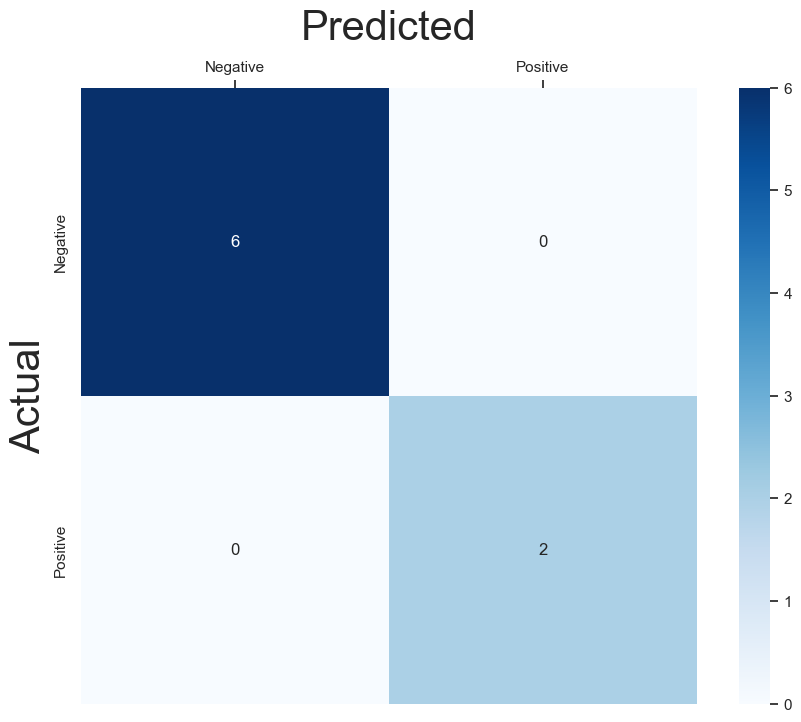

In [68]:
fig, ax = plt.subplots(figsize=(11, 8))

confusion_matrix = pd.DataFrame(data=cm, columns=['Negative', 'Positive'],
                                index=['Negative', 'Positive'])

sns.heatmap(confusion_matrix, annot=True, fmt='', cmap='Blues', square=True)

ax.xaxis.tick_top()
ax.set_title('Predicted', pad=15, fontsize='30')
plt.ylabel('Actual', fontsize='30')
plt.show()

## Classification report 

In [69]:
target_names = ['Kidney stones absent', 'Kidney stones present']

print(classification_report(y_test, y_pred_test, target_names=target_names))

                       precision    recall  f1-score   support

 Kidney stones absent       1.00      1.00      1.00         6
Kidney stones present       1.00      1.00      1.00         2

             accuracy                           1.00         8
            macro avg       1.00      1.00      1.00         8
         weighted avg       1.00      1.00      1.00         8



## Receiver Operating Curve 

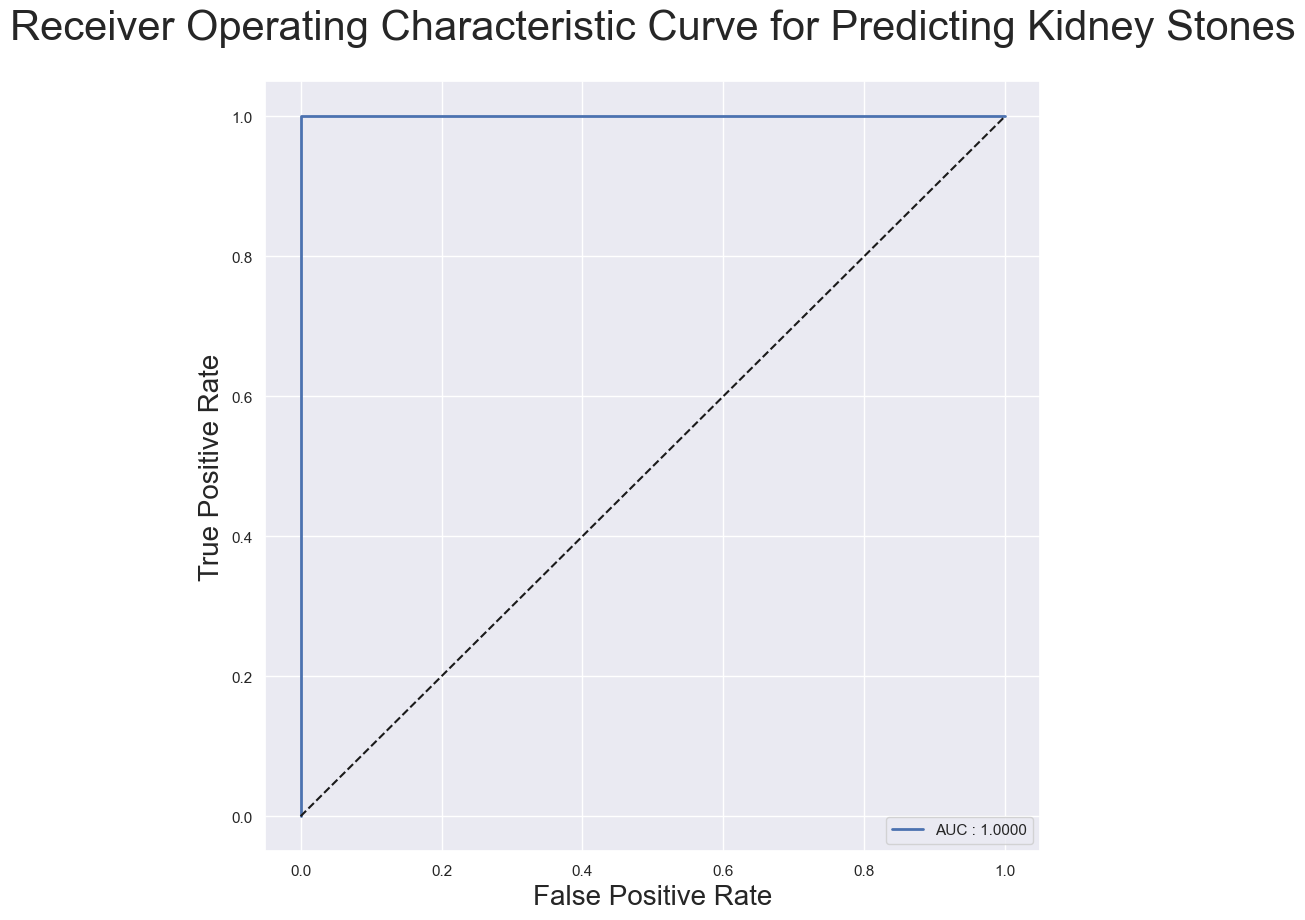

In [74]:
# Calculate AUC 

AUC = roc_auc_score(y_test, y_pred_test)

#Plot ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label=True)

plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, linewidth=2, label="AUC : {:.4f}".format(AUC))

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 25

plt.title('Receiver Operating Characteristic Curve for Predicting Kidney Stones', fontsize=30, pad=30)

plt.xlabel('False Positive Rate' , fontsize=20)

plt.ylabel('True Positive Rate', fontsize=20)

plt.legend(loc=4)

plt.show()

## Creating pipeline for future use in similar projects 

In [71]:
# Construct pipeline 

numeric_cols = list(kidney.columns)

capping = FunctionTransformer(cap_outliers)
scaling = FunctionTransformer(scale_features)

num_pipeline = Pipeline(steps=[
               ('outliers', capping),
               ('scale', scaling)]
                       )

col_trans = ColumnTransformer(transformers=[
                     ('numeric_pipeline', num_pipeline, numeric_cols)],
                     remainder='drop',
                     n_jobs=-1)

logreg = LogisticRegression(solver='lbfgs', random_state=7, max_iter=100, verbose=1)

logreg_pipeline = Pipeline(steps=[
            ('column_transformation', col_trans),
            ('model', logreg)]
                          )

In [72]:
# Display pipeline 

set_config(display='diagram')
display(logreg_pipeline)

Pipeline(steps=[('column_transformation',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('outliers',
                                                                   FunctionTransformer(func=<function cap_outliers at 0x000002420F4093A0>)),
                                                                  ('scale',
                                                                   FunctionTransformer(func=<function scale_features at 0x000002420F48EB60>))]),
                                                  ['specific_gravity',
                                                   'urine_ph', 'osmolality',
                                                   'conductivity', 'urea',
                                                   'calcium', 'outcome'])])),
                ('model', LogisticRegression(random_state=7, verbose=1))])

In [77]:
# Save pipeline 

joblib.dump(logreg_pipeline, 'logistic_classifier_kidney_stones_pipe_0.1.joblib') 

['logistic_classifier_kidney_stones_pipe_0.1.joblib']